In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import segmentation_utils

In [2]:
image = cv.imread('../images/lr5.jpg')
image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

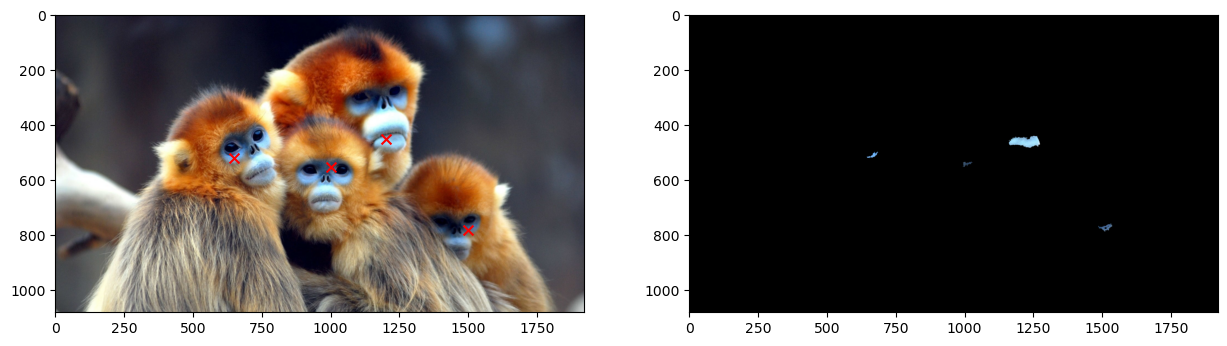

In [3]:
# определяем координаты начальных точек
seeds = [(520, 650), (450, 1200), (550, 1000), (780, 1500)]
# координаты для графика
x = list(map(lambda x: x[1], seeds))
y = list(map(lambda x: x[0], seeds))
# порог похожести цвета региона
threshold = 100
# находим сегментацию используя метод из segmentation_utils
segmented_region = segmentation_utils.region_growingHSV(image_hsv, seeds, threshold)
# накладываем маску - отображаем только участки попавшие в какой-либо сегмент
result = cv.bitwise_and(image, image, mask=segmented_region)
# отображаем полученное изображение
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.scatter(x, y, marker="x", color="red", s=50)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()

In [4]:
# посчитаем обеъекты по контурам
arr = result[:, :, 1] + result[:, :, 2] + result[:, :, 0]
fc = cv.findContours(arr, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
contours = fc[0]
len(contours)

4